In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Distance between two points Eucladian Distance
def distance(a1,a2):
    return np.sqrt(np.sum((a1-a2)**2))

In [3]:
import pandas as pd
data = pd.read_csv("./data.csv")

In [4]:
data

,Date,Latitude,Longitude,Magnitude
0,2017-02-06T20:11:14.000Z,38.894376,-76.997556,4
1,2017-06-03T12:54:27.000Z,38.906838,-77.058661,6
2,2017-04-07T00:00:00.000Z,38.960739,-77.018034,16
3,2017-05-31T11:39:56.000Z,38.905151,-77.063998,4
4,2017-07-30T00:00:00.000Z,38.949532,-77.020246,16
...,...,...,...,...
33111,2017-12-23T17:15:25.000Z,38.918640,-77.031953,4
33112,2017-12-30T06:13:28.000Z,38.927417,-77.021727,6
33113,2017-12-30T16:07:46.000Z,38.919739,-77.033395,4
33114,2017-12-30T22:06:45.000Z,38.937766,-76.974186,4


In [5]:
data = data.values

In [6]:
data.shape

(33116, 4)

In [7]:
X = data[:,1:3]
Y = data[:,-1]

In [8]:
Y

array(['4', '6', '16', ..., '4', '4', '6'], dtype=object)

In [9]:
X

array([[38.8943760400963, -76.9975562157838],
       [38.906837914346795, -77.0586610722644],
       [38.960738912776606, -77.0180339208511],
       ...,
       [38.9197387988788, -77.0333948878201],
       [38.9377663503043, -76.9741862375847],
       [38.9514233340209, -77.0238113553697]], dtype=object)

In [10]:
X[0]

array([38.8943760400963, -76.9975562157838], dtype=object)

In [11]:
for i in range(Y.shape[0]):
    if(Y[i]=='ARSON'):
        print('c')
        Y[i]=0

c
c
c
c
c


In [12]:
Y

array(['4', '6', '16', ..., '4', '4', '6'], dtype=object)

In [13]:
Y = [int(i) for i in Y]

In [14]:
np.unique(Y)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

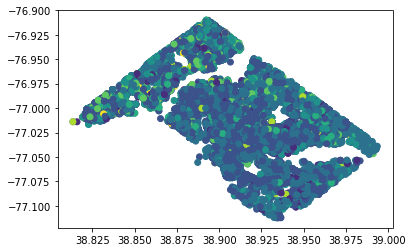

In [15]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

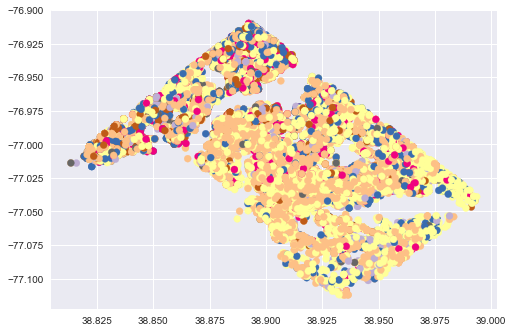

In [17]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent')
plt.show()

In [33]:
np.random.uniform(low=38.5, high=39.0, size=2)

array([38.87878525, 38.60369913])

In [63]:
np.random.uniform(low=-2, high=-1, size=2)

array([-1.66395661, -1.95687364])

In [76]:
center=np.zeros((2,))
cx = np.random.uniform(low=38.8250, high=39.0000)
cy = np.random.uniform(low=-76.9, high=-77.15)
center[0] = cx
center[1] = cy

In [37]:
c

[76.99873840396378, 38.73462314810721]

In [70]:
x=10*(2*np.random.random((X.shape[1],))-1)
print(x.shape)

(2,)


In [45]:
c=np.array(c)

In [46]:
print(type(x))
print(type(c))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [77]:
# Distance between two points Eucladian Distance
def distance(a1,a2):
    return np.sqrt(np.sum((a1-a2)**2))

class KMeans():
    def __init__(self,k=5,max_iter=100):
        self.k= k
        self.max_iter=max_iter
        self.clusters = {}
        self.label = []
        
    def initialization(self,X):
        for i in range(self.k):
            center=np.zeros((2,))
            cx = np.random.uniform(low=38.8250, high=39.0000)
            cy = np.random.uniform(low=-76.9, high=-77.15)
            center[0] = cx
            center[1] = cy
            #center = 10*(2*np.random.random((X.shape[1],))-1)
            points = []
            cluster = {
                'center':center,
                'points':points,
                'id'    :i
            }
            self.clusters[i]=cluster
        self.label = np.zeros((X.shape[0],1))
    
    def assignPointTOClusters(self,X):
        for i in range(X.shape[0]):
            dist = []
            curr_x = X[i]
        
            for ki in range(self.k):
                d = distance(curr_x,self.clusters[ki]['center'])
                dist.append(d)
            
            current_cluster = np.argmin(dist)
            self.clusters[current_cluster]['points'].append(curr_x)
            self.label[i]=(self.clusters[current_cluster]['id'])
            
    def check(self,old_c,new_c):
        distances = [distance(old_c[i], new_c[i]) for i in range(self.k)]
        return sum(distances) == 0
        
    def updateClusters(self):
        for kx in range(self.k):
            pts = np.array(self.clusters[kx]['points'])
            
            if pts.shape[0]>0: # If cluster has some nonzero points
                new_u = pts.mean(axis=0)
                self.clusters[kx]['center'] = new_u
                # Clear the list
                self.clusters[kx]['points'] = []
    
    def plotClusters(self):
        for kx in range(self.k):
            print(len(self.clusters[kx]['points']))
            pts = np.array(self.clusters[kx]['points'])
            # plot points , cluster center
            try:
                plt.scatter(pts[:,0],pts[:,1])
            except:
                pass
            uk = self.clusters[kx]['center']
            plt.scatter(uk[0],uk[1],color='black',marker="*")
        plt.show()
            
    def fit(self,X):
        print(self.k)
        self.initialization(X)
        for i in range(self.max_iter):
            print("i is ",i)
            self.assignPointTOClusters(X)
            self.plotClusters()
            old_c = [self.clusters[i]['center'] for i in range(self.k)]
            self.updateClusters()
            new_c = [self.clusters[i]['center'] for i in range(self.k)]
            if self.check(old_c,new_c):
                break

5
i is  0
1
23036
3113
4137
2829


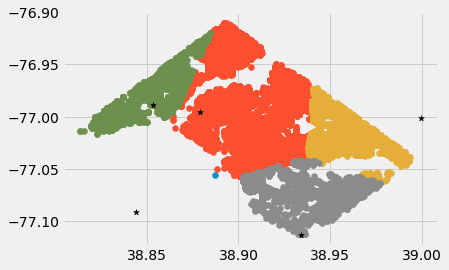

i is  1
3265
14559
5118
7164
3010


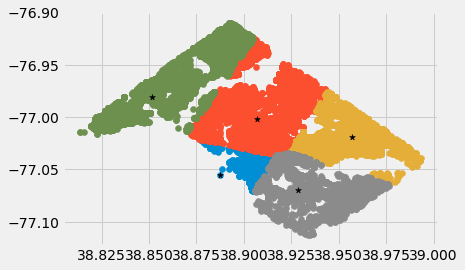

i is  2
6871
10598
5648
8035
1964


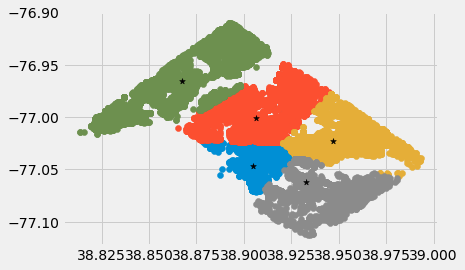

i is  3
8732
9338
5458
7892
1696


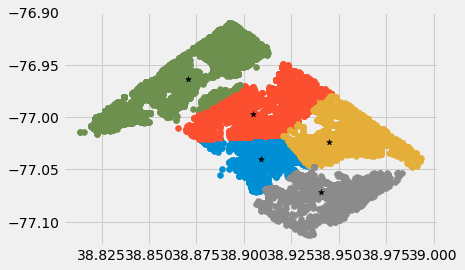

i is  4
9704
8806
5139
7793
1674


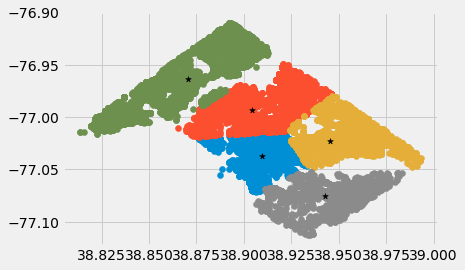

i is  5
10205
8538
4945
7712
1716


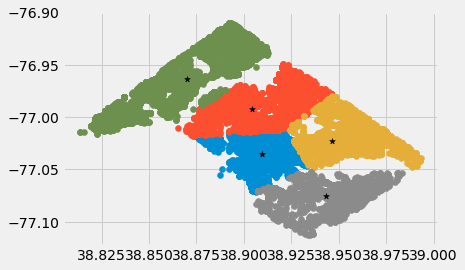

i is  6
10605
8438
4648
7693
1732


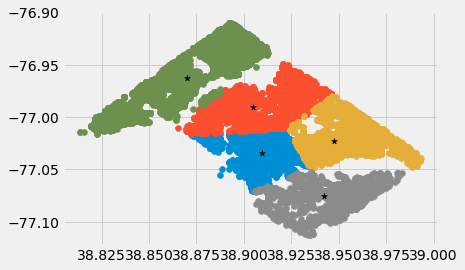

i is  7
10817
8416
4440
7691
1752


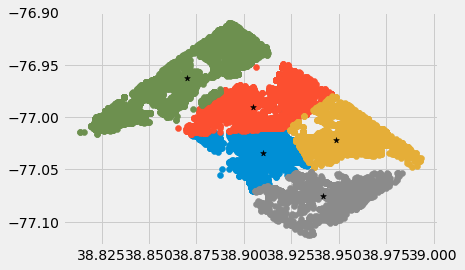

i is  8
10952
8423
4280
7691
1770


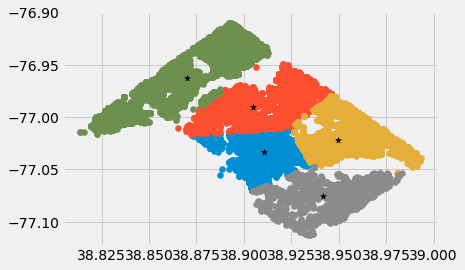

i is  9
11104
8431
4117
7691
1773


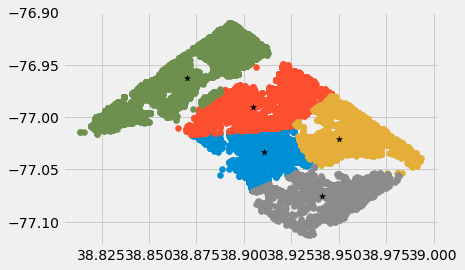

i is  10
11170
8430
4054
7688
1774


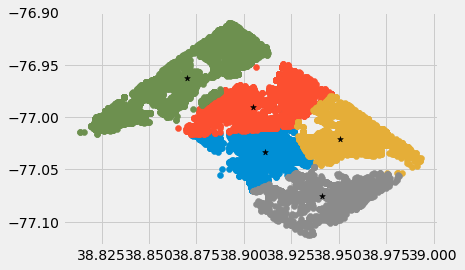

i is  11
11224
8407
4023
7688
1774


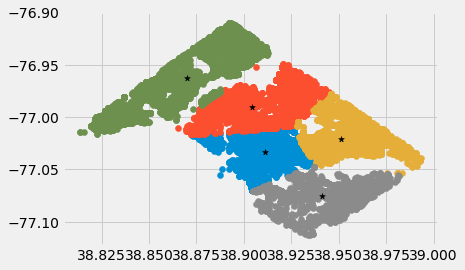

i is  12
11234
8397
4023
7688
1774


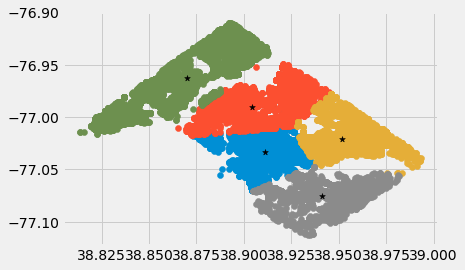

i is  13
11225
8407
4022
7688
1774


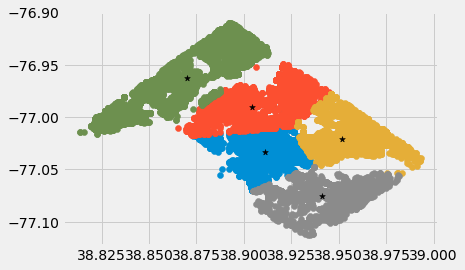

i is  14
11225
8405
4025
7687
1774


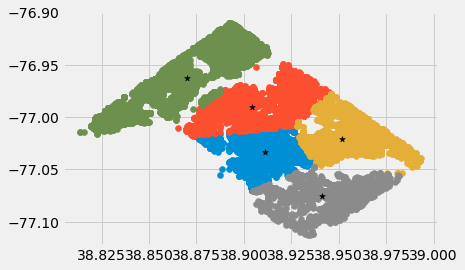

i is  15
11225
8405
4025
7687
1774


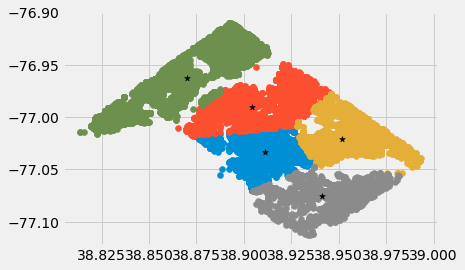

In [78]:
km = KMeans(max_iter=30)
km.fit(X)

In [79]:
for i in range(km.k):
    print(km.clusters[i]['center'])

[38.91134109220496 -77.03361906566005]
[38.90430098558821 -76.99061366168489]
[38.95150181204069 -77.02059394212975]
[38.87010809727059 -76.96320655787713]
[38.941243275587745 -77.07505979205493]


8
i is  0
18009
2092
6790
3658
2517
50
0
0


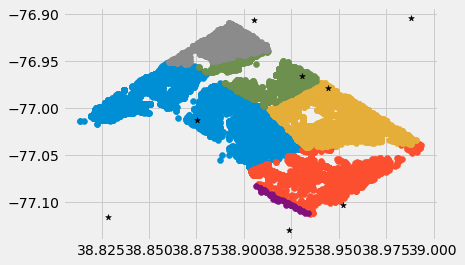

i is  1
12338
3115
8322
5221
3835
285
0
0


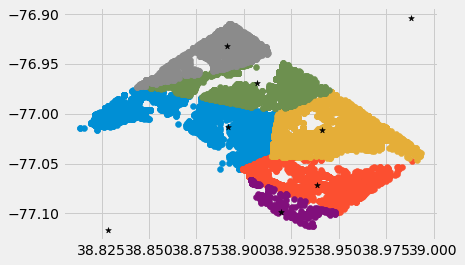

i is  2
9015
4322
9059
5754
4528
438
0
0


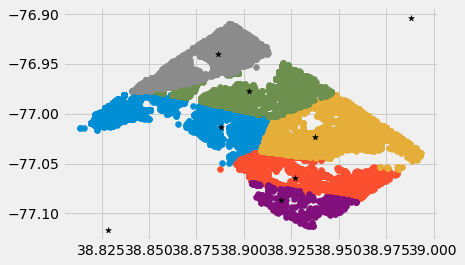

i is  3
7612
4730
9009
5816
4775
1174
0
0


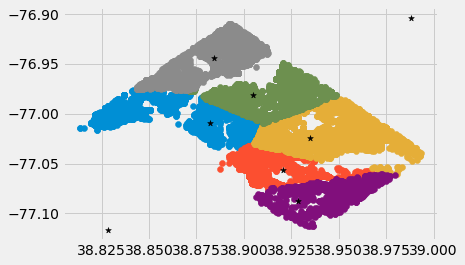

i is  4
6434
6523
7892
6374
4500
1393
0
0


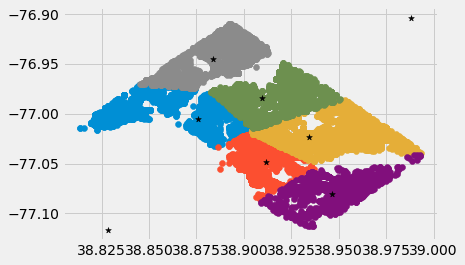

i is  5
5683
8364
6547
6894
4074
1554
0
0


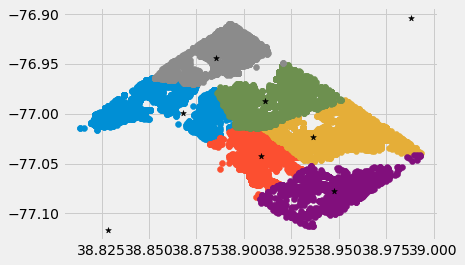

i is  6
5641
9271
5694
6992
3875
1643
0
0


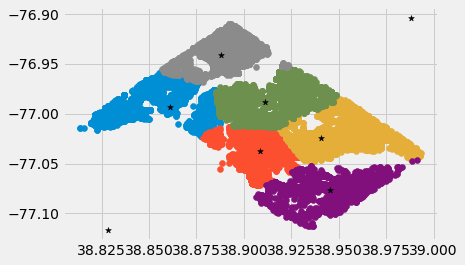

i is  7
5525
9658
5303
7150
3799
1681
0
0


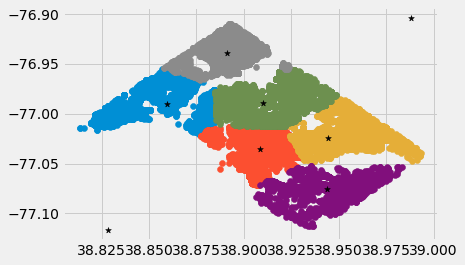

i is  8
5481
9884
5073
7162
3795
1721
0
0


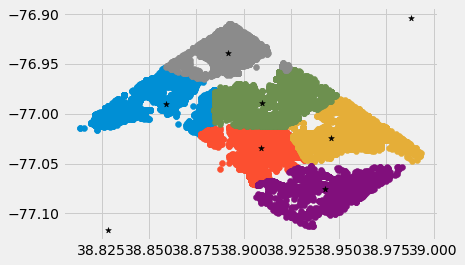

i is  9
5427
10044
4908
7212
3795
1730
0
0


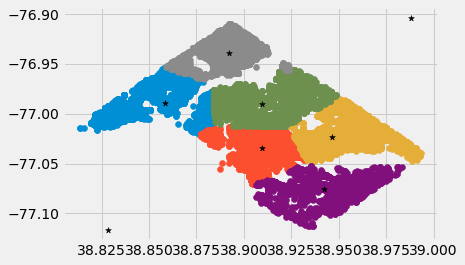

i is  10
5417
10454
4552
7159
3797
1737
0
0


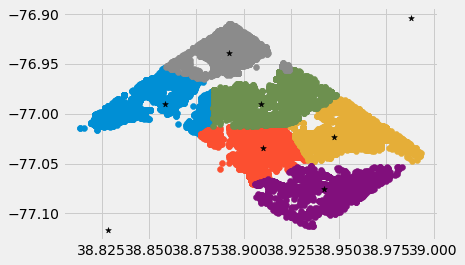

i is  11
5416
10735
4274
7160
3797
1734
0
0


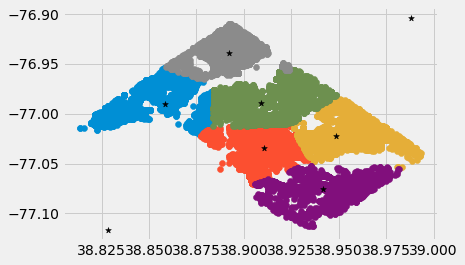

i is  12
5419
10922
4079
7161
3797
1738
0
0


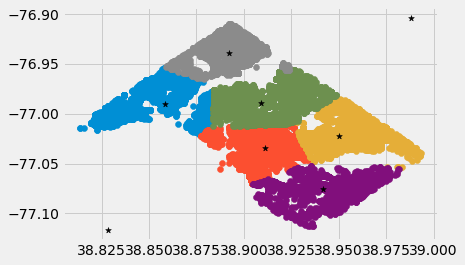

i is  13
5420
11041
3943
7161
3797
1754
0
0


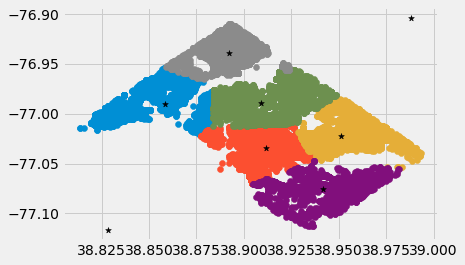

i is  14
5429
11099
3875
7161
3797
1755
0
0


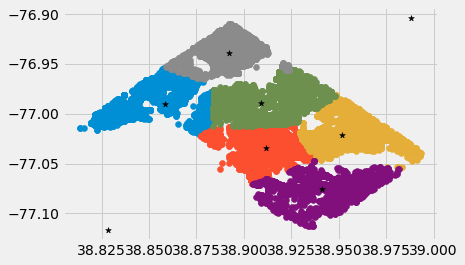

i is  15
5428
11139
3836
7161
3798
1754
0
0


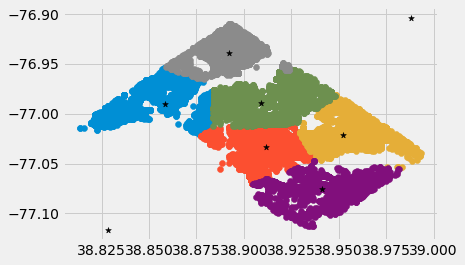

i is  16
5428
11156
3820
7161
3798
1753
0
0


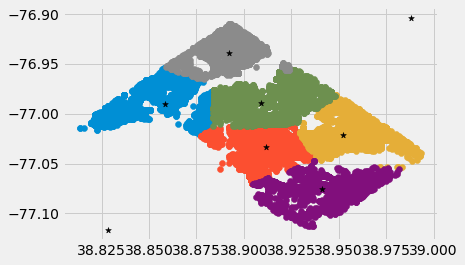

i is  17
5428
11170
3805
7161
3798
1754
0
0


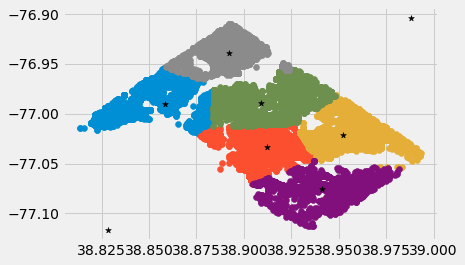

i is  18
5428
11174
3801
7161
3798
1754
0
0


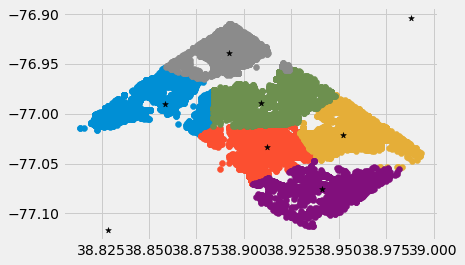

i is  19
5428
11180
3795
7161
3798
1754
0
0


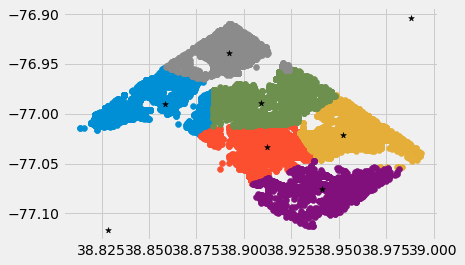

i is  20
5428
11180
3797
7159
3798
1754
0
0


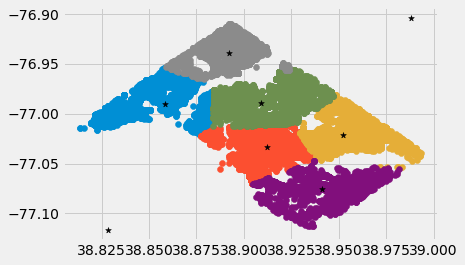

i is  21
5428
11180
3797
7159
3798
1754
0
0


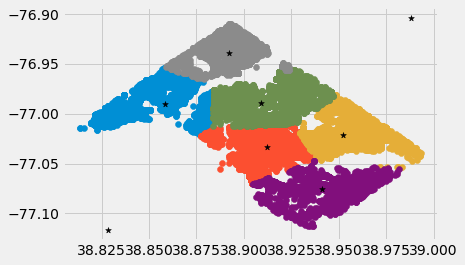

In [80]:
km = KMeans(k=8,max_iter=30)
km.fit(X)

8
i is  0
2685
0
124
17
4004
0
7797
18489


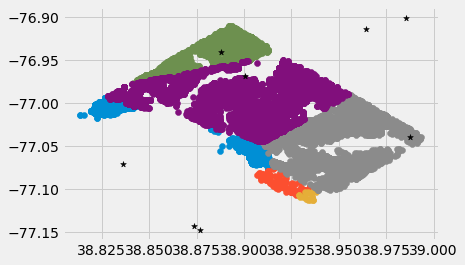

i is  1
4800
0
900
435
5406
0
8699
12876


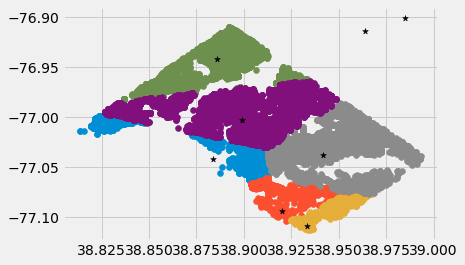

i is  2
5696
0
1733
958
5580
0
8293
10856


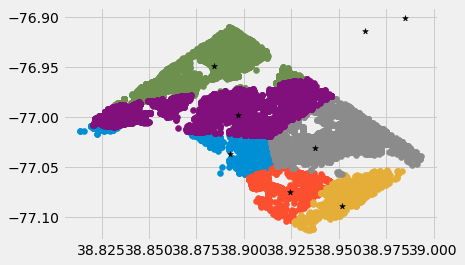

i is  3
7225
0
2073
1128
5210
0
7300
10180


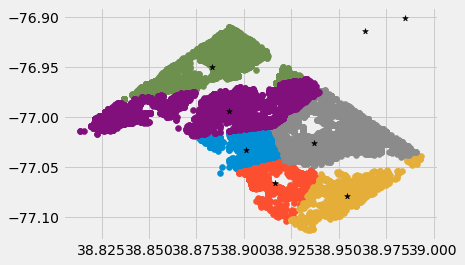

i is  4
8157
0
2399
1230
4778
0
6916
9636


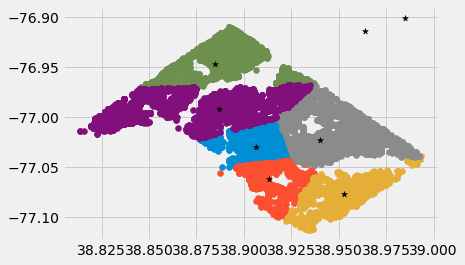

i is  5
8402
0
2972
1281
4473
0
6762
9226


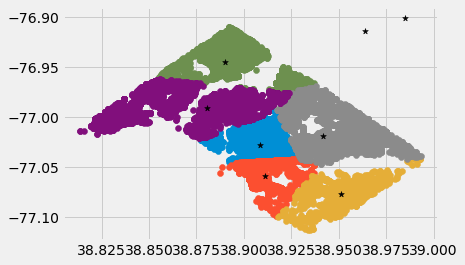

i is  6
8495
0
3586
1327
4485
0
6453
8770


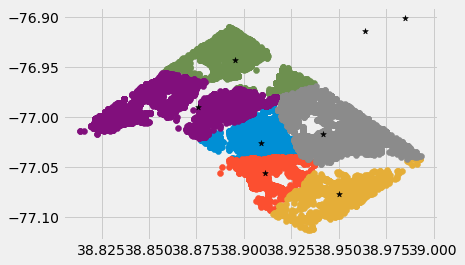

i is  7
8548
0
4100
1388
4586
0
6276
8218


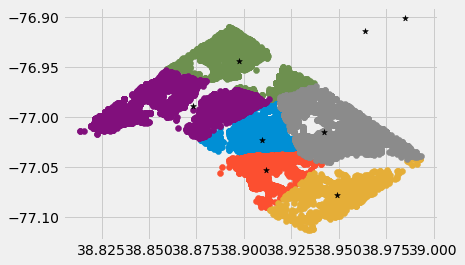

i is  8
8800
0
4510
1416
4811
0
5976
7603


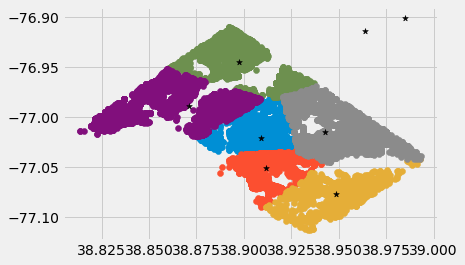

i is  9
9173
0
4947
1430
4949
0
5606
7011


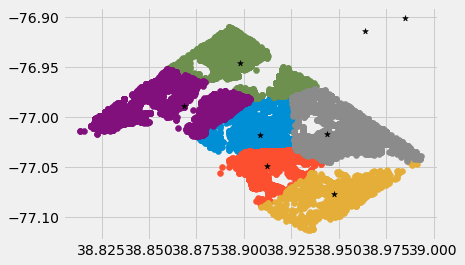

i is  10
9066
0
5937
1456
5097
0
5391
6169


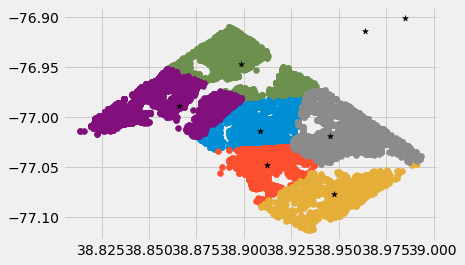

i is  11
8743
0
7276
1489
4858
0
4998
5752


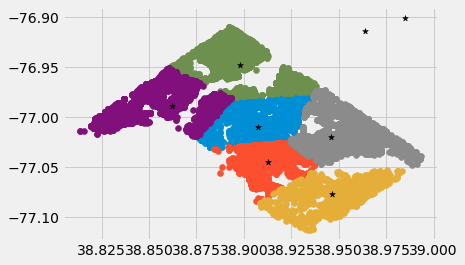

i is  12
8524
0
8549
1551
4464
0
4588
5440


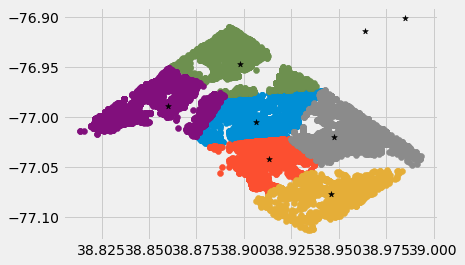

i is  13
8443
0
9598
1588
4119
0
4294
5074


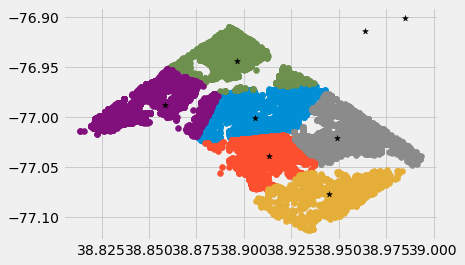

i is  14
8383
0
10349
1642
3894
0
4078
4770


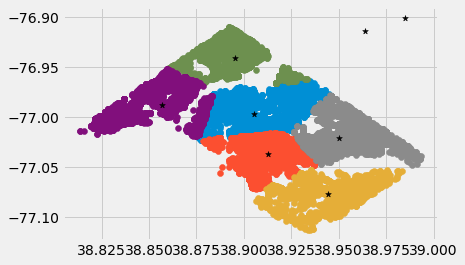

i is  15
8069
0
10896
1664
3837
0
3977
4673


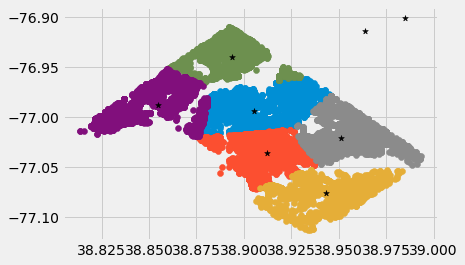

i is  16
7971
0
11060
1713
3845
0
3910
4617


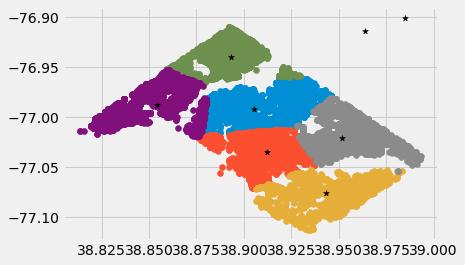

i is  17
7798
0
11103
1732
3851
0
3894
4738


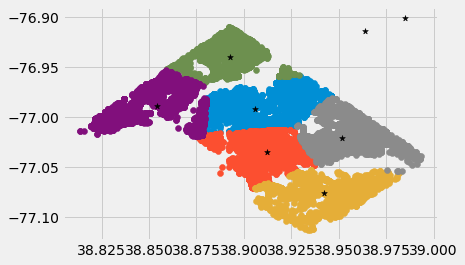

i is  18
7670
0
11162
1738
3848
0
3870
4828


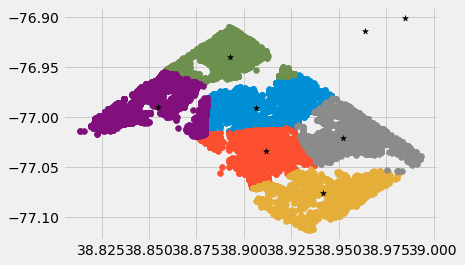

i is  19
7624
0
11172
1754
3840
0
3855
4871


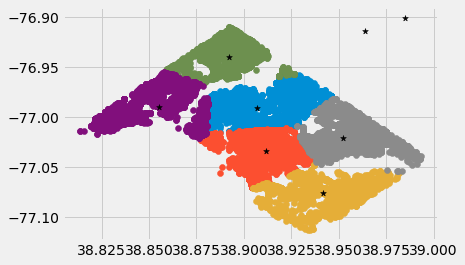

i is  20
7614
0
11174
1758
3840
0
3845
4885


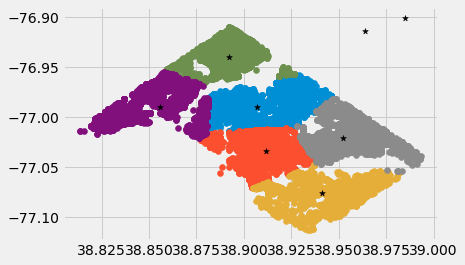

i is  21
7592
0
11183
1759
3840
0
3835
4907


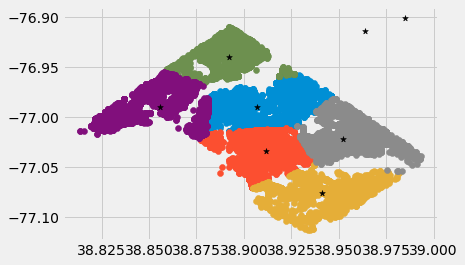

i is  22
7570
0
11190
1759
3840
0
3828
4929


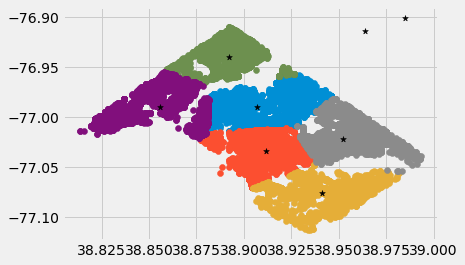

i is  23
7559
0
11183
1759
3840
0
3827
4948


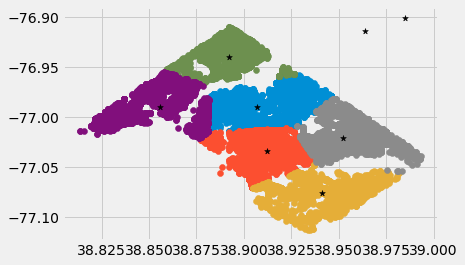

i is  24
7559
0
11183
1759
3840
0
3827
4948


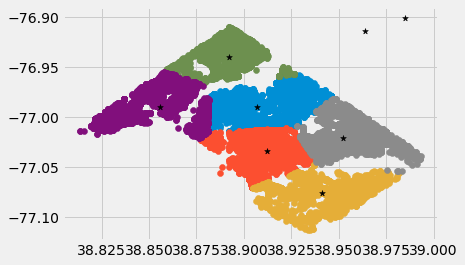

In [83]:
km = KMeans(k=8,max_iter=30)
km.fit(X)